# PATTERN RECOGNITION IN AUDIO SIGNALS

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TIME-DOMAIN" data-toc-modified-id="TIME-DOMAIN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>TIME DOMAIN</a></span><ul class="toc-item"><li><span><a href="#Display-the-complete-audio-sequence" data-toc-modified-id="Display-the-complete-audio-sequence-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Display the complete audio sequence</a></span></li><li><span><a href="#Zoom-into-noise-in-general" data-toc-modified-id="Zoom-into-noise-in-general-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Zoom into noise in general</a></span></li><li><span><a href="#Zoom-into-background-noise" data-toc-modified-id="Zoom-into-background-noise-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Zoom into background noise</a></span></li><li><span><a href="#Zoom-into-mainly-car-related-noise" data-toc-modified-id="Zoom-into-mainly-car-related-noise-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Zoom into mainly car-related noise</a></span></li><li><span><a href="#Zoom-into-the-throw-stones-into-water-sections" data-toc-modified-id="Zoom-into-the-throw-stones-into-water-sections-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Zoom into the throw-stones-into-water sections</a></span></li></ul></li><li><span><a href="#FREQUENCY-DOMAIN" data-toc-modified-id="FREQUENCY-DOMAIN-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>FREQUENCY DOMAIN</a></span><ul class="toc-item"><li><span><a href="#Whole-audio-sample" data-toc-modified-id="Whole-audio-sample-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Whole audio sample</a></span></li><li><span><a href="#Background-noise" data-toc-modified-id="Background-noise-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Background noise</a></span></li><li><span><a href="#Mainly-car-related-noise" data-toc-modified-id="Mainly-car-related-noise-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Mainly car-related noise</a></span></li><li><span><a href="#Throw-stones-into-water-noise" data-toc-modified-id="Throw-stones-into-water-noise-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Throw-stones-into-water noise</a></span></li></ul></li><li><span><a href="#PICTURE-EXPLAINING-THE-FEATURES" data-toc-modified-id="PICTURE-EXPLAINING-THE-FEATURES-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>PICTURE EXPLAINING THE FEATURES</a></span></li><li><span><a href="#DESCRIBE-THE-RELEVANT-FEATURES" data-toc-modified-id="DESCRIBE-THE-RELEVANT-FEATURES-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>DESCRIBE THE RELEVANT FEATURES</a></span></li><li><span><a href="#ALGORITHM-TO-IDENTIFY-RECORDINGS-OUT-OF-ANY-OTHER" data-toc-modified-id="ALGORITHM-TO-IDENTIFY-RECORDINGS-OUT-OF-ANY-OTHER-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>ALGORITHM TO IDENTIFY RECORDINGS OUT OF ANY OTHER</a></span></li></ul></div>

In [1]:
import numpy as np
import simpleaudio as sa
from scipy import signal
from scipy.io import wavfile
from scipy.fft import fftfreq, rfft, irfft
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
import time
import functionsForPlots as fp

import warnings
warnings.filterwarnings('ignore')

In [2]:
fs, data, duration, t = fp.readSample('StonesIntoRiverNextToRoad.wav')

## play the whole audio sample
sa.play_buffer(data, 1, 2, fs)

*****************************************************
## TIME DOMAIN
*Explore the audio file you recorded in the time domain. Look out for features that could be specific to your recording.*

### Display the complete audio sequence

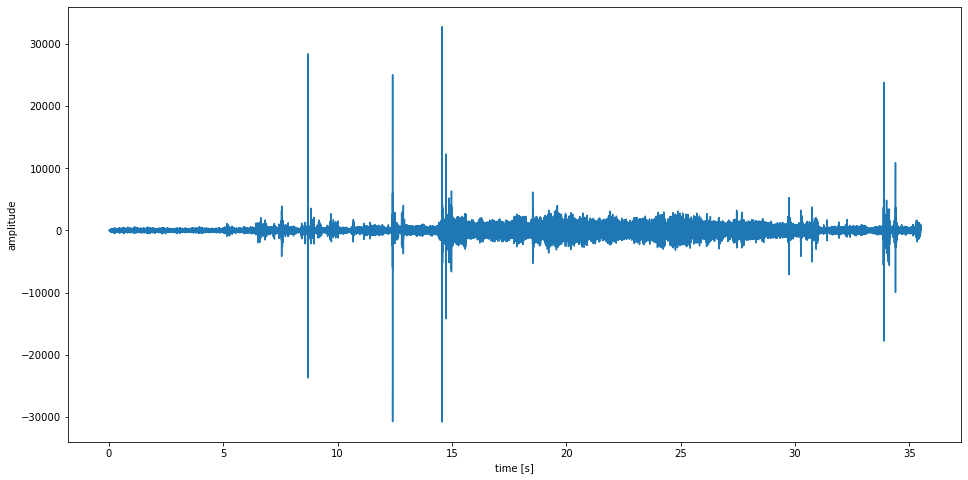

In [9]:
## time series
fp.plotAmplitude(t=t, data=data)

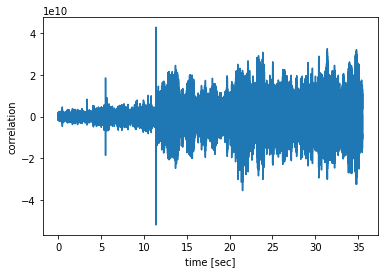

In [6]:
## correlation plot
whole_sequence = fp.plotCorrelation(start=0, end=duration, fs=fs,
                                    data=data, t=t)

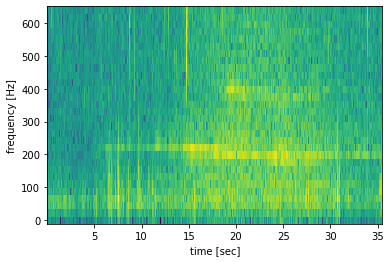

In [8]:
## spectrogram
upper_limit = 30
f, t2, S = signal.spectrogram(whole_sequence["audio_section"], 
                              fs, nperseg=2000)
fp.plotSpectrogram(t=t2, f=f[0:upper_limit], S=np.log(S[0:upper_limit, :]))

### Zoom into noise in general

(-4000.0, 4000.0)

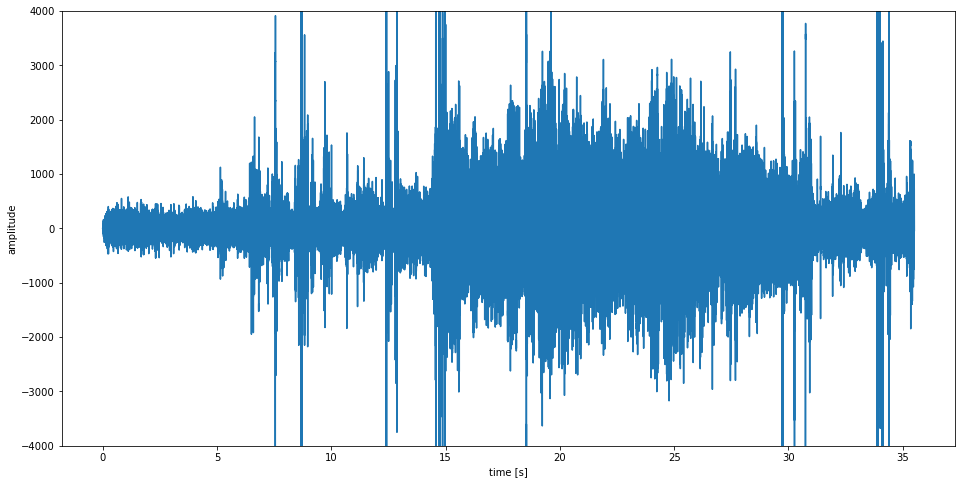

In [10]:
## time series
fp.plotAmplitude(t=t, data=data)
plt.ylim(-4000, 4000) 

For correlation plot and spectrogram: see above (section 1.1).

### Zoom into background noise

In [11]:
## define start and end of time window in seconds
start = 0
end = 5

(0.0, 5.0)

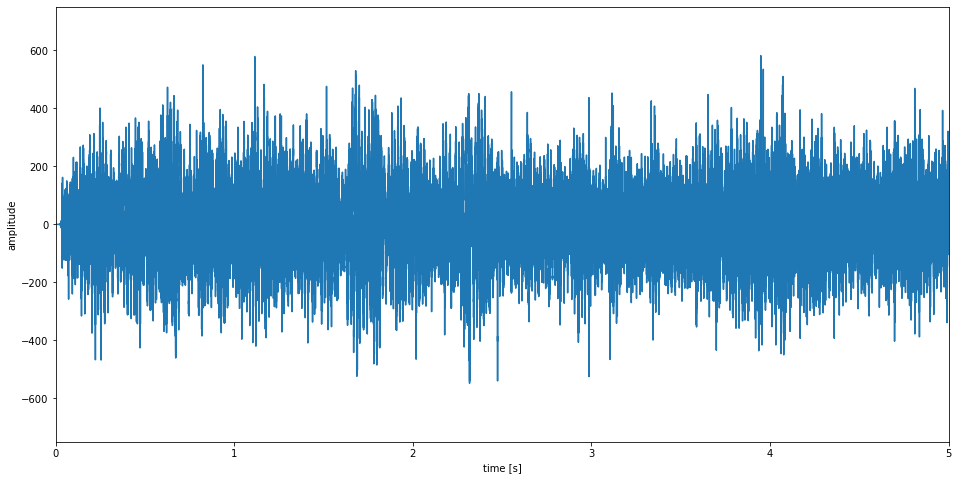

In [12]:
## time series
fp.plotAmplitude(t=t, data=data)
plt.ylim(-750, 750)
plt.xlim(start, end)   

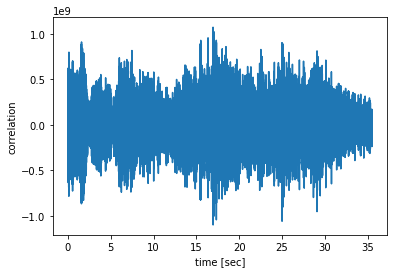

In [15]:
## correlation plot
noise_sequence = fp.plotCorrelation(start=start, end=end, 
                                    data=data, fs=fs, t=t)

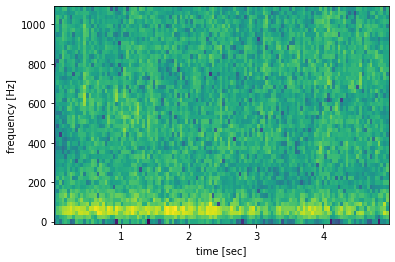

In [16]:
## spectrogram
upper_limit = 50
f, t2, S = signal.spectrogram(noise_sequence["audio_section"], fs, nperseg=2000)
fp.plotSpectrogram(t=t2, f=f[0:upper_limit], S=np.log(S[0:upper_limit, :]))

### Zoom into mainly car-related noise

In [ ]:
## define start and end of time window in seconds
start = 14
end = 29

(0.0, 5.0)

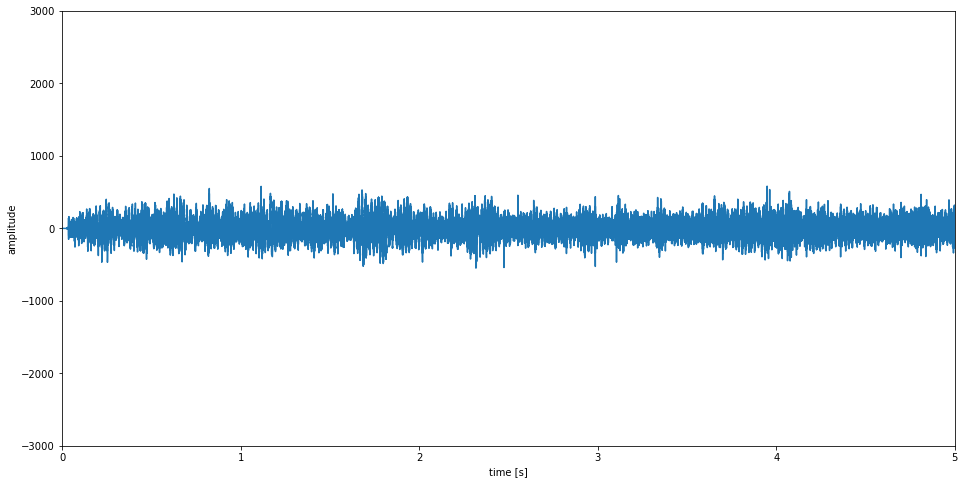

In [17]:
fp.plotAmplitude(t=t, data=data)
plt.ylim(-3000, 3000)
plt.xlim(start, end)

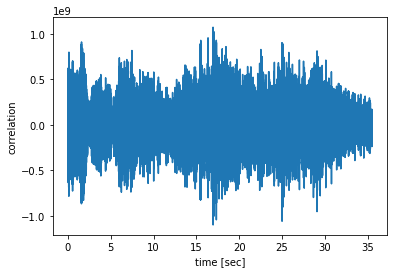

In [18]:
## correlation plot
car_sequence = fp.plotCorrelation(start=start, end=end, 
                                  data=data, fs=fs, t=t)

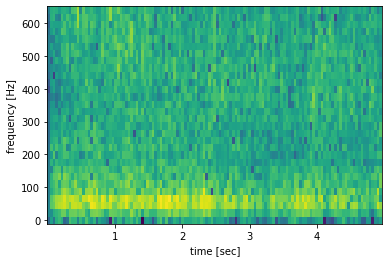

In [19]:
## spectrogram
upper_limit = 30
f, t2, S = signal.spectrogram(car_sequence["audio_section"], fs, nperseg=2000)
fp.plotSpectrogram(t=t2, f=f[0:upper_limit], S=np.log(S[0:upper_limit, :]))

### Zoom into the throw-stones-into-water sections

In [31]:
## define start time window in seconds
starts = [8.65, 12.35, 14.53, 29.7, 33.85]
dur = 0.1

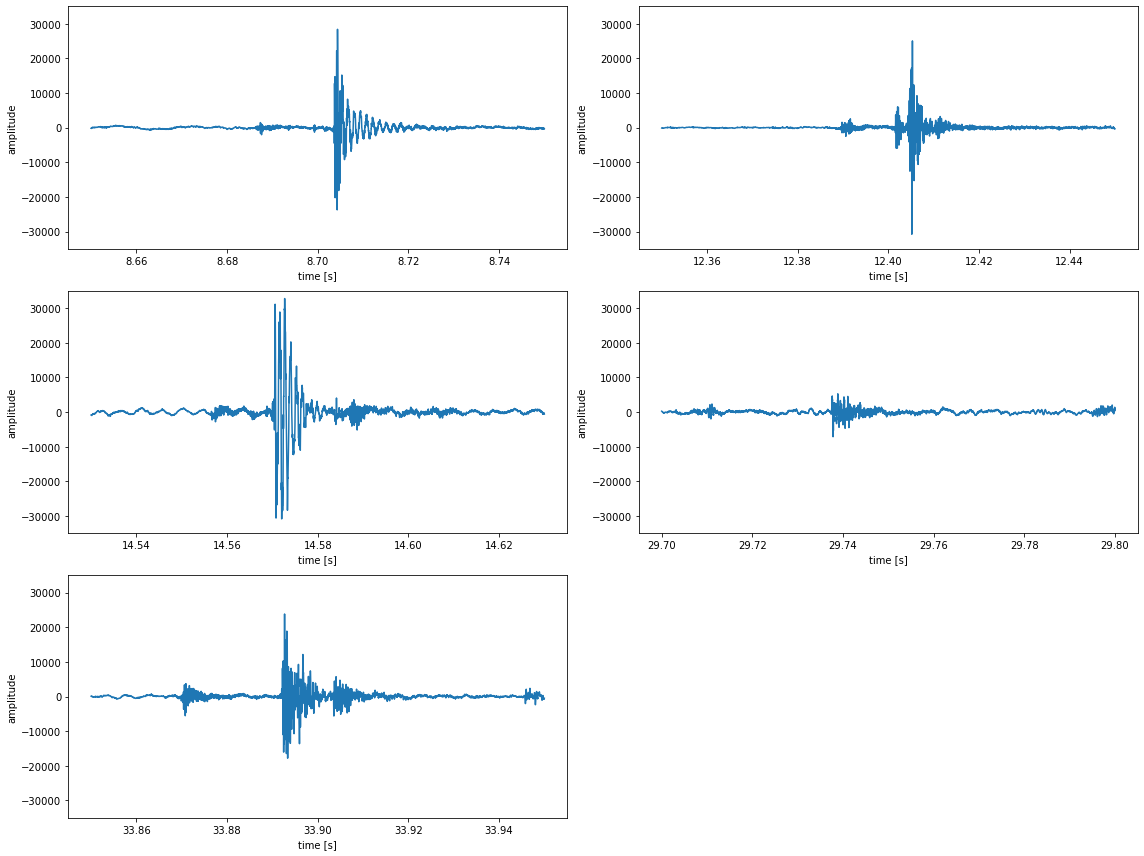

In [35]:
## create plots for the stone-into-river audio signal
plt.figure(figsize=(16,12))
for i, stone in enumerate(starts, 1):    
    
    sec_start = stone
    sec_end = sec_start + dur

    section = data[int(sec_start*fs):int(sec_end*fs)]
    section_duration = len(section)/fs

    time_stone = np.arange(0, section_duration, 1/fs)    
    plt.subplot(3, 2, i)
    plt.plot(time_stone+sec_start, section)
    plt.ylim(-35000, 35000)  
    plt.xlabel("time [s]")
    plt.ylabel("amplitude")
    plt.tight_layout()

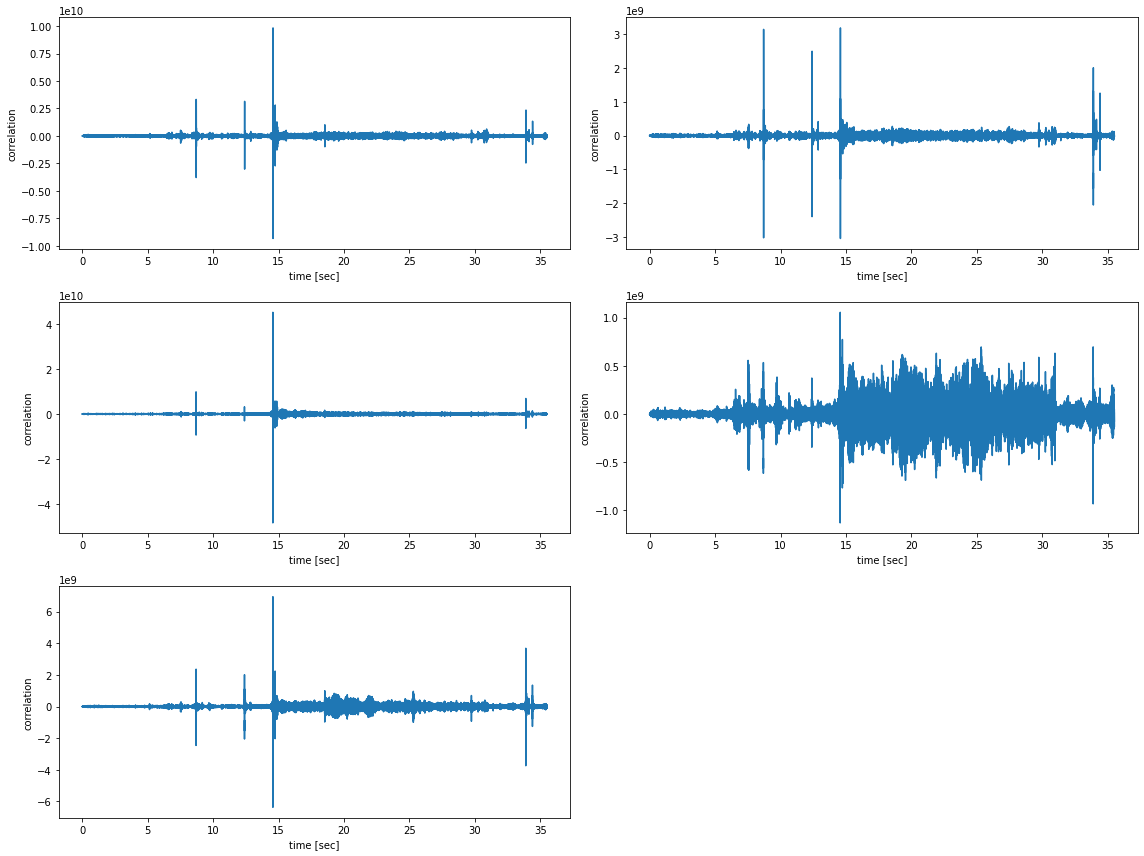

In [24]:
## correlation plots
stone_sequences = []
plt.figure(figsize=(16,12))
for i, start in enumerate(starts, 1):
    plt.subplot(3, 2, i)
    stone_sequence = fp.plotCorrelation(start=start, end=start+dur, 
                                        data=data, fs=fs, t=t)
    stone_sequences.append(stone_sequence)
    plt.tight_layout()

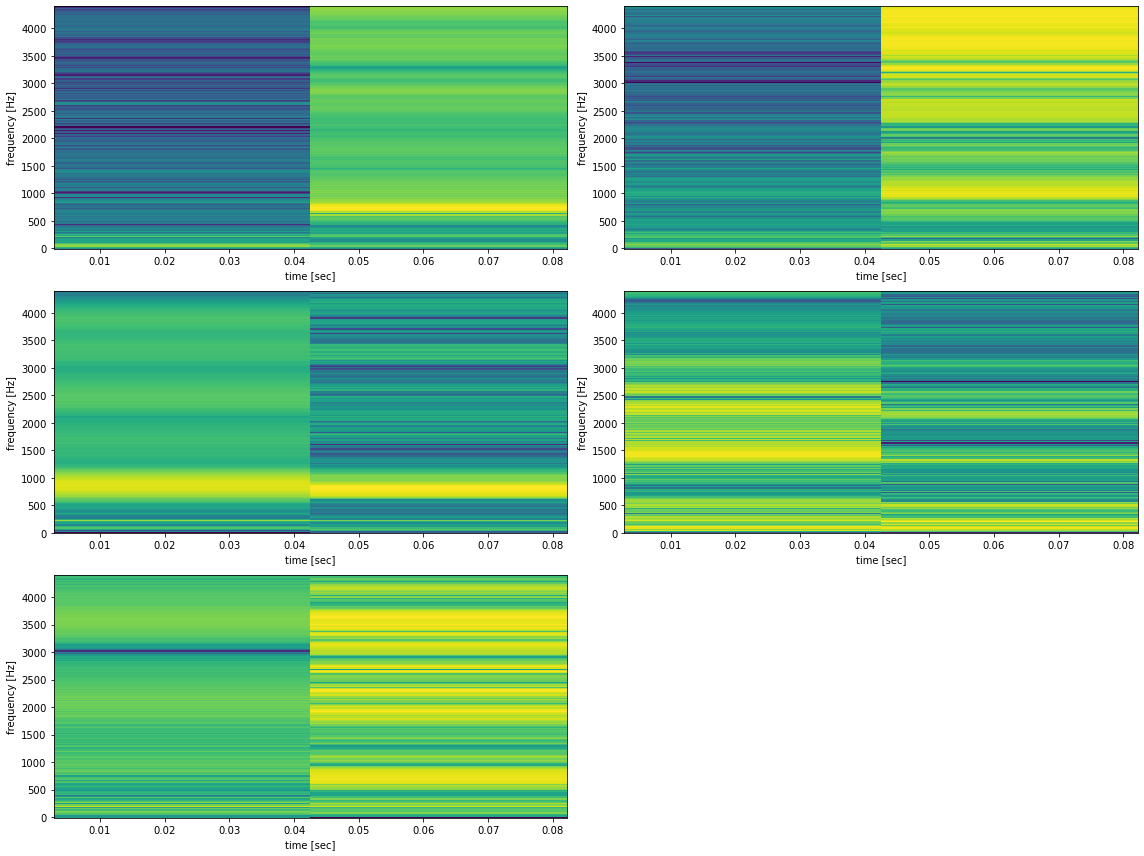

In [25]:
## spectrograms
upper_limit = 200
plt.figure(figsize=(16,12))
for i, start in enumerate(starts, 1):
    plt.subplot(3, 2, i)
    f, t2, S = signal.spectrogram(stone_sequences[i-1]["audio_section"], fs, nperseg=2000)
    fp.plotSpectrogram(t=t2, f=f[0:upper_limit], S=np.log(S[0:upper_limit, :]))
    plt.tight_layout()

*****************************************************
## FREQUENCY DOMAIN
*Explore the audio file you recorded in the frequency domain. Look out for features that could be specific to your recording.*

### Whole audio sample

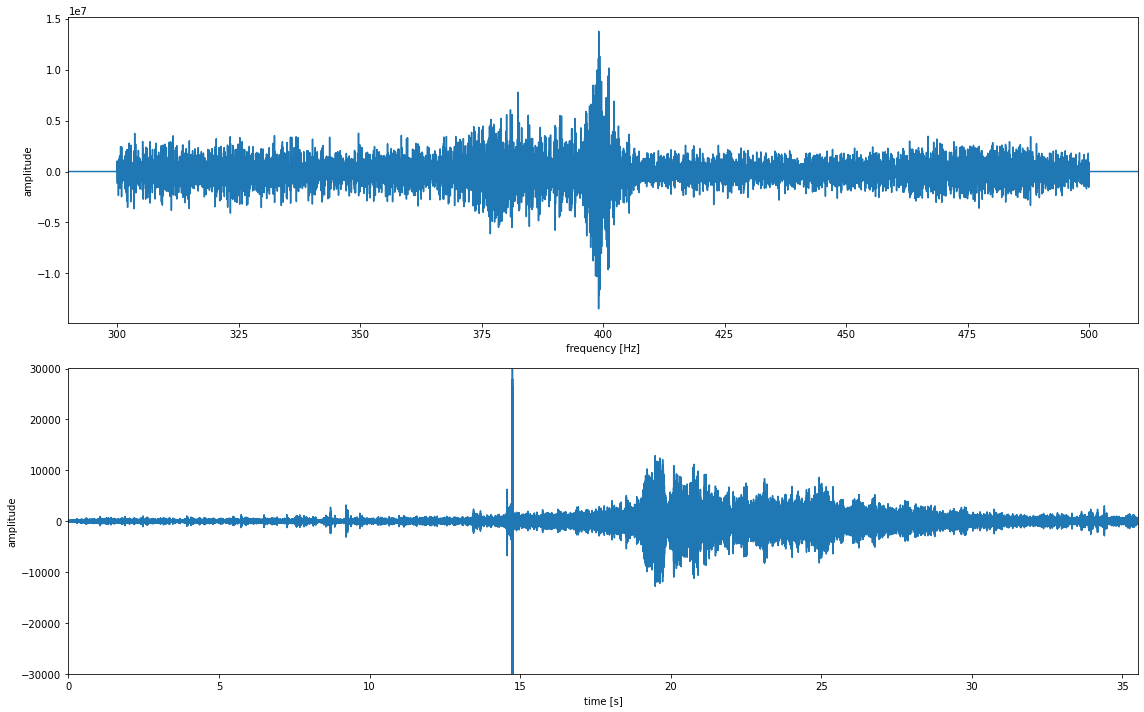

In [30]:
fp.transformAudio(audio_section = whole_sequence["audio_section"], 
                  time_start = whole_sequence["sec_times"][0], 
                  time_end = whole_sequence["sec_times"][1], 
                  lower_bond = 300, 
                  upper_bond = 500, 
                  fs=fs, play=False)

### Background noise

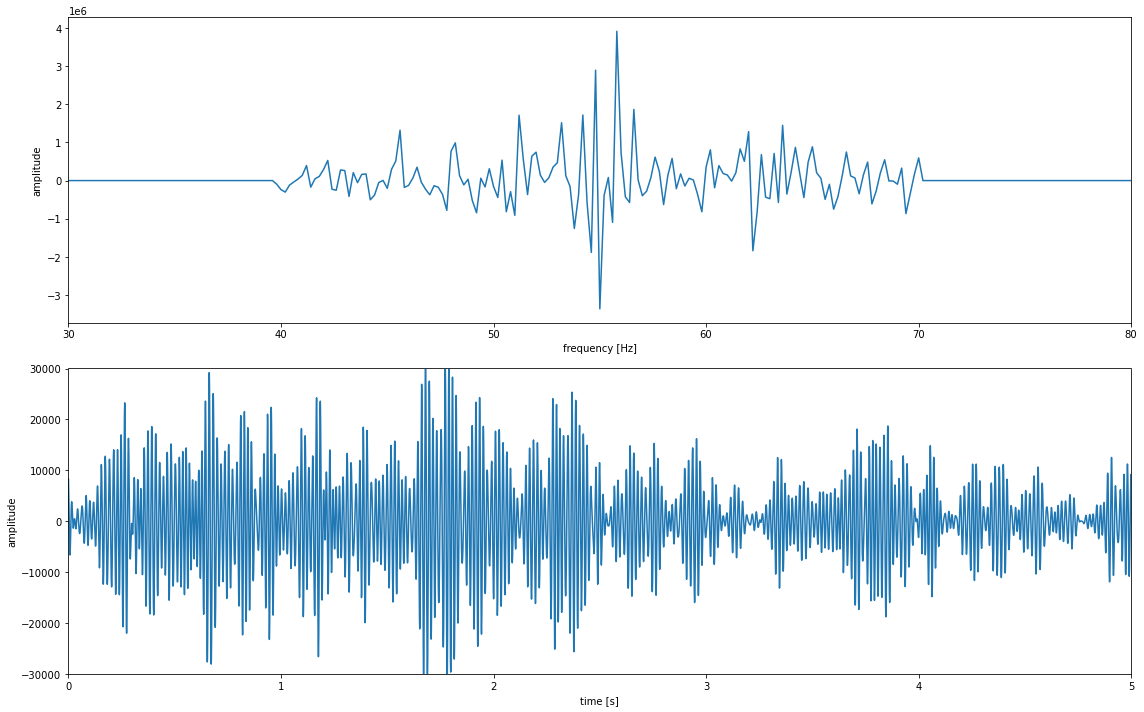

In [36]:
## white noise
fp.transformAudio(audio_section = noise_sequence["audio_section"], 
                  time_start = noise_sequence["sec_times"][0], 
                  time_end = noise_sequence["sec_times"][1], 
                  lower_bond = 40, 
                  upper_bond = 70, 
                  fs=fs, play=True)

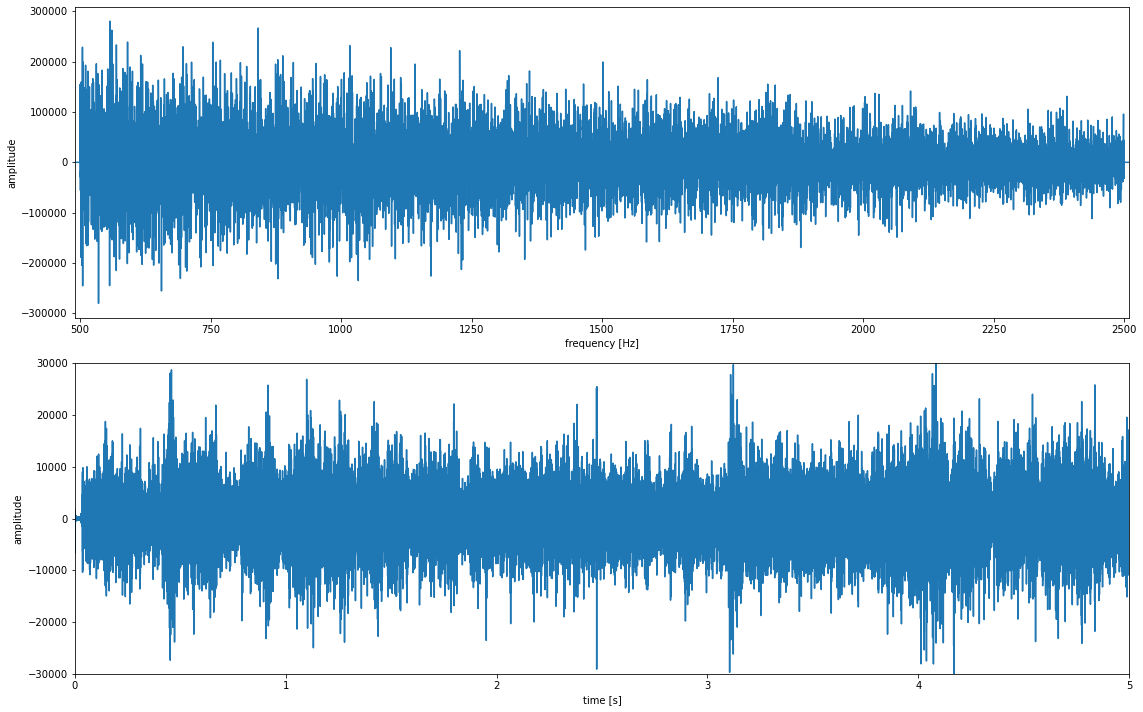

In [37]:
## flowing water (river)
fp.transformAudio(audio_section = noise_sequence["audio_section"], 
                  time_start = noise_sequence["sec_times"][0], 
                  time_end = noise_sequence["sec_times"][1], 
                  lower_bond = 500, 
                  upper_bond = 2500, 
                  fs=fs, play=True)

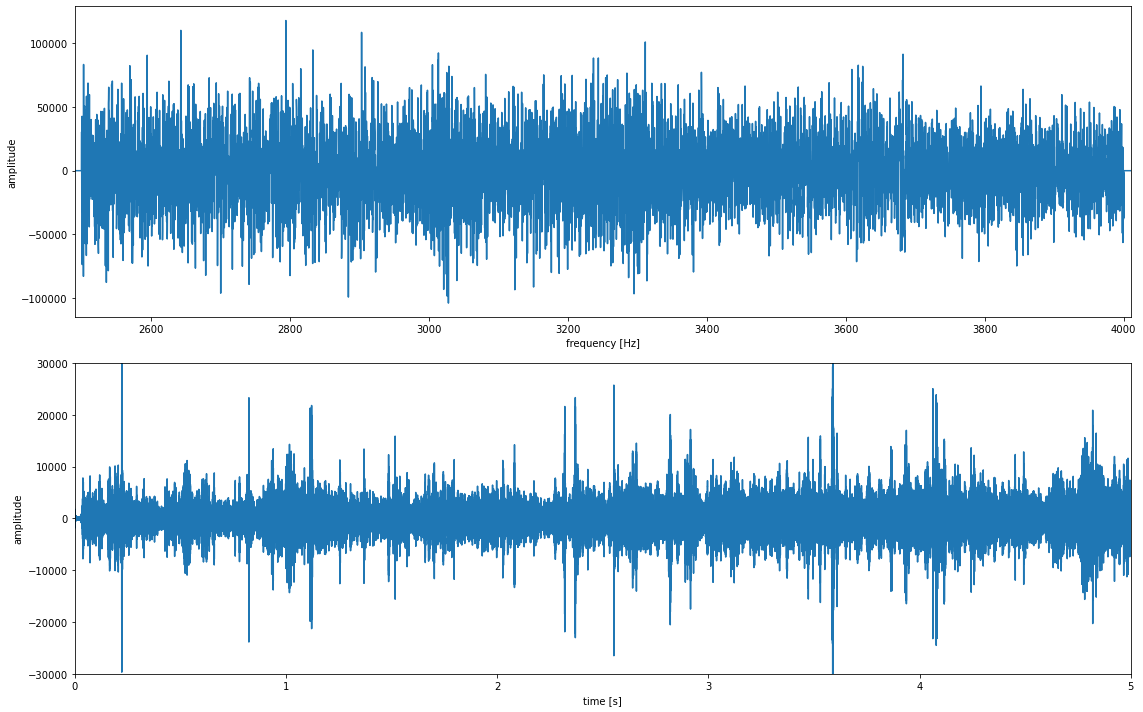

In [38]:
## birds
fp.transformAudio(audio_section = noise_sequence["audio_section"], 
                  time_start = noise_sequence["sec_times"][0], 
                  time_end = noise_sequence["sec_times"][1], 
                  lower_bond = 2500, 
                  upper_bond = 4000, 
                  fs=fs, play=True)

### Mainly car-related noise

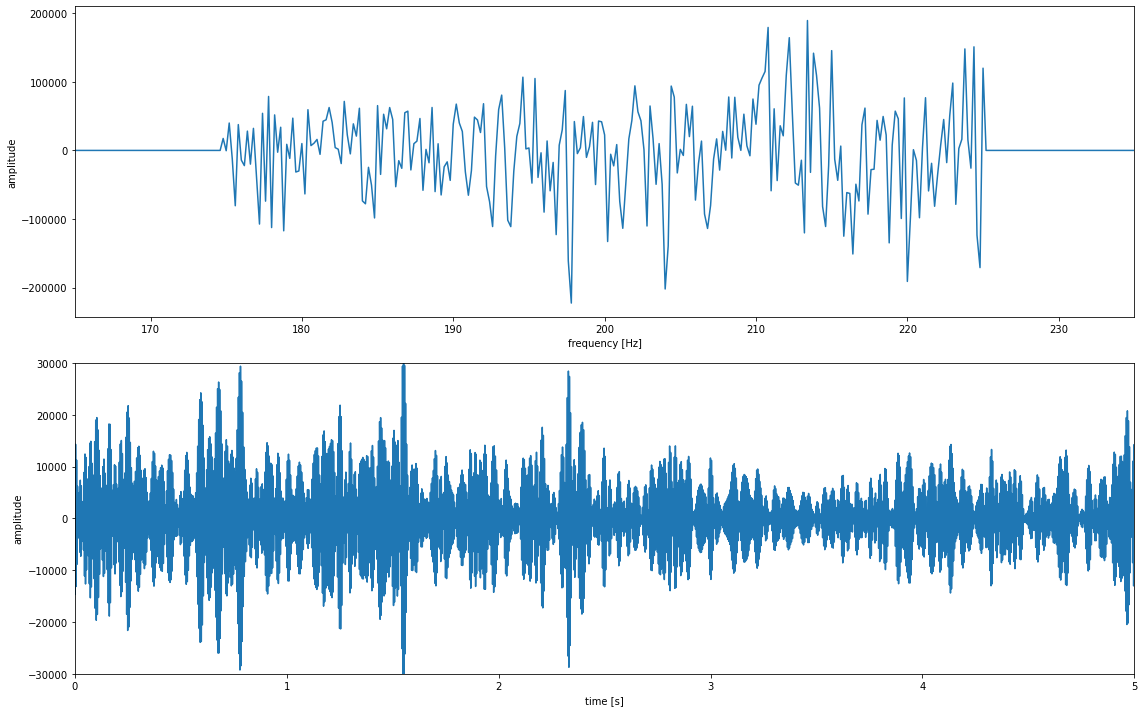

In [39]:
fp.transformAudio(audio_section = car_sequence["audio_section"], 
                  time_start = car_sequence["sec_times"][0], 
                  time_end = car_sequence["sec_times"][1], 
                  lower_bond = 175, 
                  upper_bond = 225, 
                  fs=fs, play=False)

### Throw-stones-into-water noise

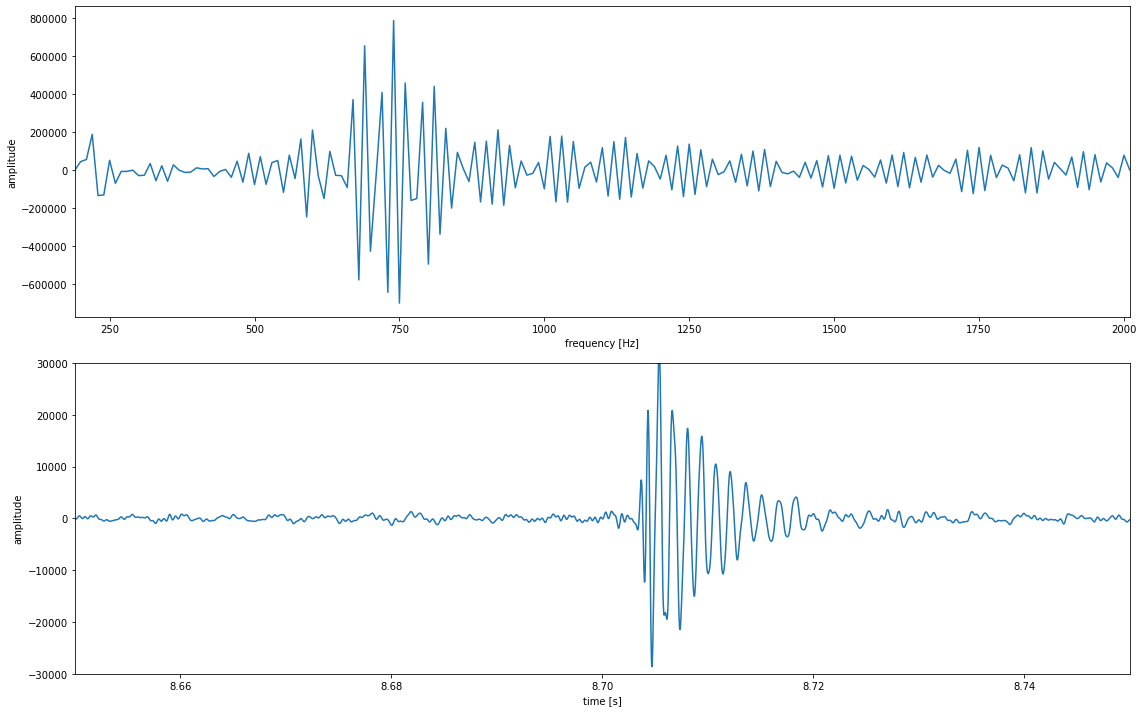

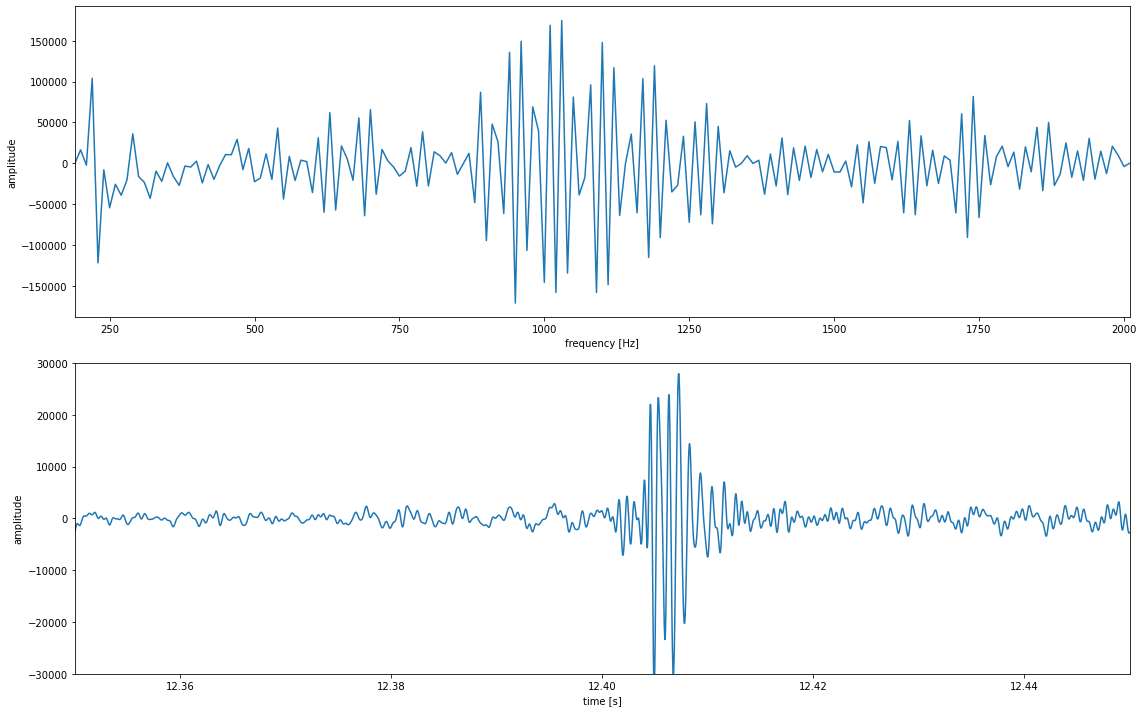

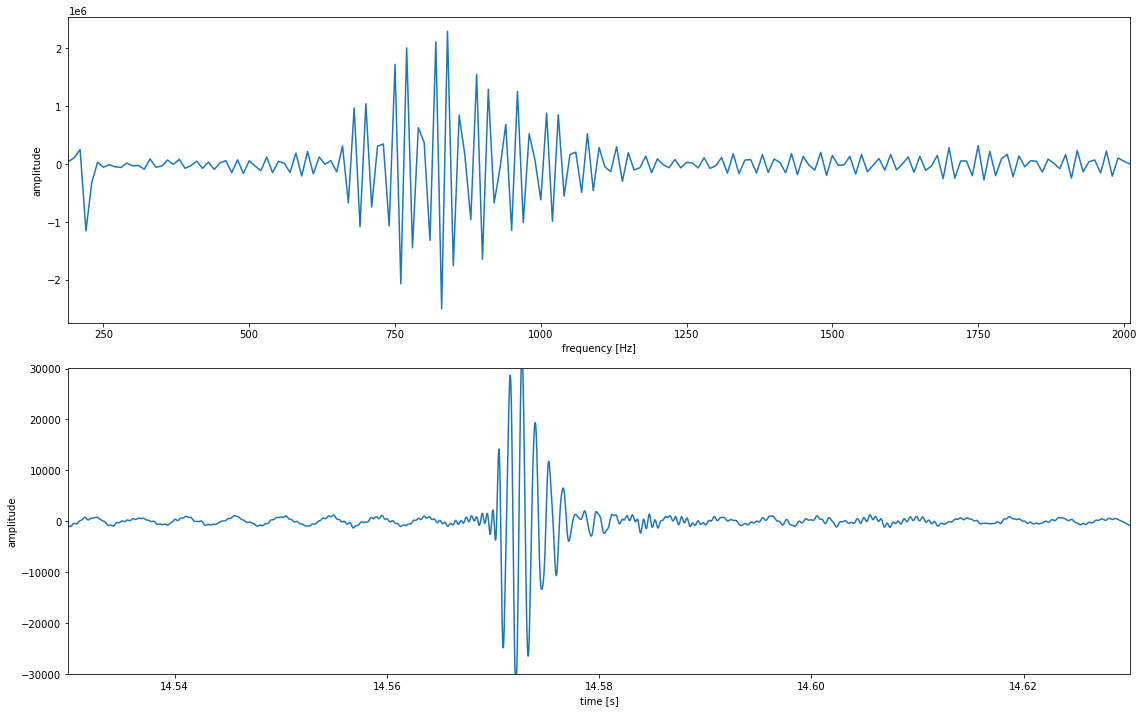

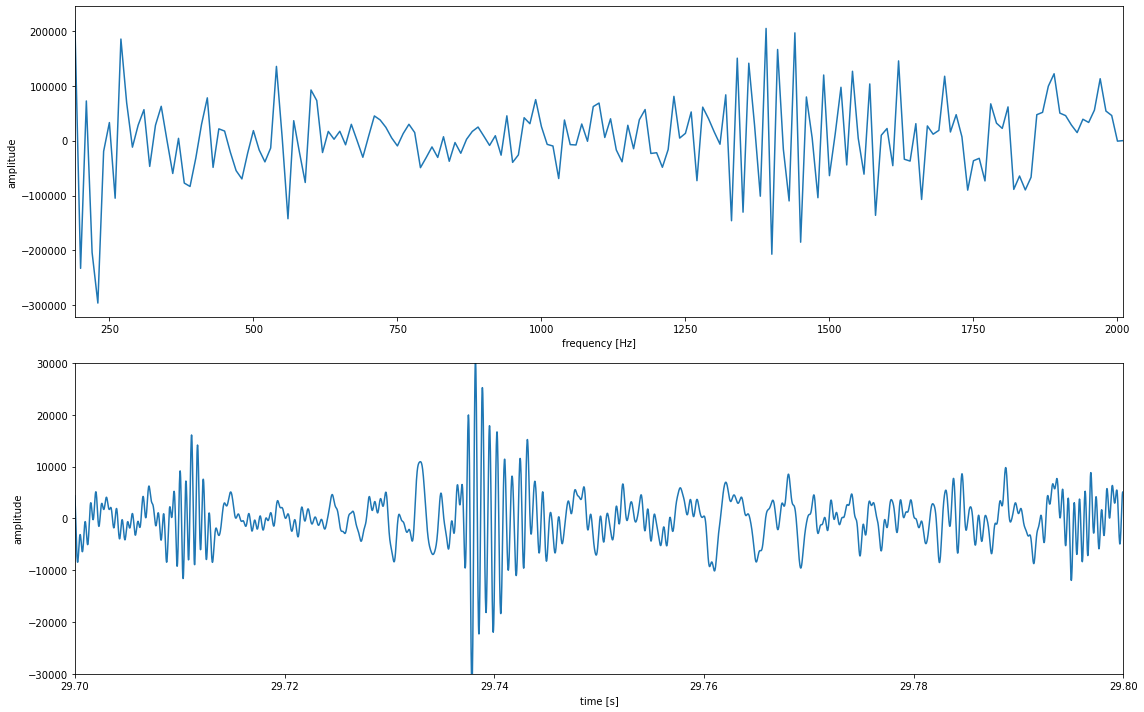

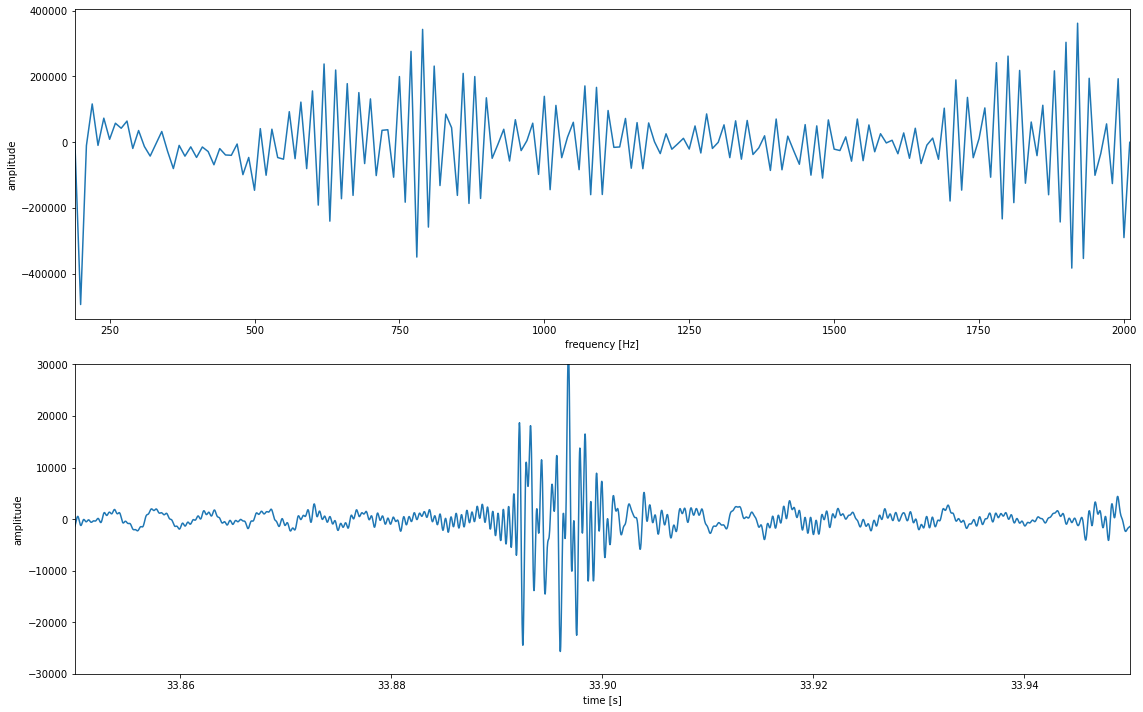

In [40]:
for elem in stone_sequences:
#     print(elem)
    fp.transformAudio(audio_section = elem["audio_section"], 
                      time_start = elem["sec_times"][0], 
                      time_end = elem["sec_times"][1], 
                      lower_bond = 200, 
                      upper_bond = 2000, 
                      fs=fs, play=False)

*****************************************************
## PICTURE EXPLAINING THE FEATURES

Please refer to *SignalAnalsis.png*.

![Task4](./SignalAnalysis.png)

*****************************************************
## DESCRIBE THE RELEVANT FEATURES

One of the samples from exercise 01 was converted from *m4p* to *wav* format. The resulting file *StonesIntoRiverNextToRoad.wav* was then analysed.<br><br>
This file contains various elements such as
-	background noise
-	a car passing by: at approx. seconds 14-29
-	stones are falling into water: at approx. seconds 8.65, 12.35, 14.53, 29.7, 33.85

The background noise shows an amplitude of about (-200 / +200). It is a relatively constant noise, which might be attributed to singing birds, flowing water (river) and potentially a light breeze (wind). <br>

In the time window 14-29s, there are cars passing by. One of them (a truck or bus) makes up most of this noise while a few other cars are far more in the background. Because there is not only one motorized vehicle, but one of them is in the major focus, the signal is not as constant as the background noise. However, it is not too much varying. This vehicle-specific sound “adds” up to the background noise so that the amplitude is now (-1500 / +1500). <br>

For the noise that appears when a stone is dropped into water, you see an initial huge signal (up to amplitude (-30000 / +30000)), which sinusoidally lowers down within 0.02 seconds or less. At time 33.8s, there is a similar pattern appearing shortly after the first one lowered. This one is generally smaller in amplitude and might refer to either another stone further away dropping into water or to the stone flying again onto the water surface.

*****************************************************
## ALGORITHM TO IDENTIFY RECORDINGS OUT OF ANY OTHER
*Write down a rough sketch of the algorithm in form of pseudo-code*

The following table gives a better overview over the different parts which should be integrated into the algorithm:


 Kind of Noise | Time [s] | Frequency [Hz] 
---------------|----------|----------------
 Background noises | 0 - 35 | 30-70 (potentially wind)
  | 0 - 35 | 500 - 2000 (floating water / river)
  | 0 - 35 | 2500 - 4000 (singing birds)
 Cars / truck | 14 - 29 | 175-225 
 Stones into water | 8.65 – 9.65 | 600-800 
 | 12.35 – 13.35 | 900-1200 
 | 14.53 – 15.53 | 600-1000
  | 29.7 - 30.7 | 1250-1400
 | 33.85- 34.85 | 700-900
 
 In general those signals need to be "added up" in a way so that the signals do not cancel out but instead overlay at the given time windows (so that the sinusoidal curves point into the same direction).